# Закрепление знаний Python-13: Визуализация данных

## Подготовка к анализу

Импорт данных

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
plt.style.use('default')

Подгрузка данных

In [2]:
data = pd.read_csv('data/churn.csv')

In [3]:
data.drop('RowNumber', axis=1, inplace=True)

Краткий обзор данных

In [4]:
display(data.info())
display(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


None

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Задание 9.1

Построение графика

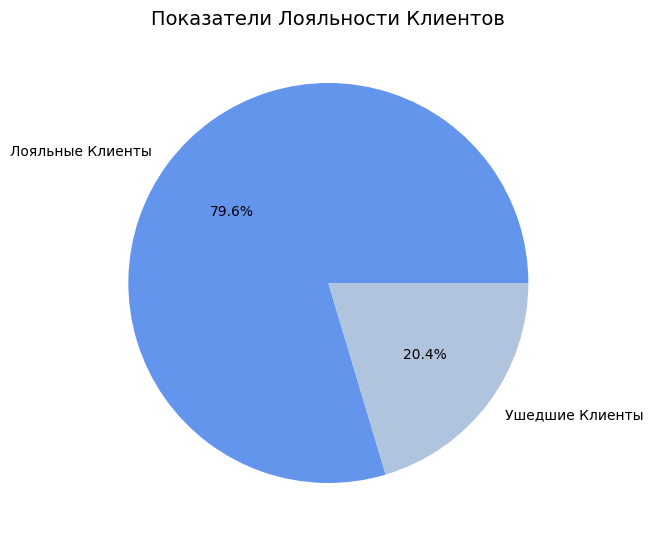

In [17]:
pie_data91=data['Exited'].value_counts()
fig91=plt.figure(figsize=(5,5))
axes91=fig91.add_axes([0,0,1,1])
axes91.pie(
    pie_data91,
    labels=['Лояльные Клиенты', 'Ушедшие Клиенты'],
    colors=['cornflowerblue','lightsteelblue'],
    autopct='%.1f%%'
)

axes91.set_title('Показатели Лояльности Клиентов', fontsize=14);

Комментарий к графику 9.1:
Из представленных данных следует, что одна пятая всех пользователей накопительных счетов банка отказалась от сотрудничества с данным банком.

## Задание 9.2

Построение графика

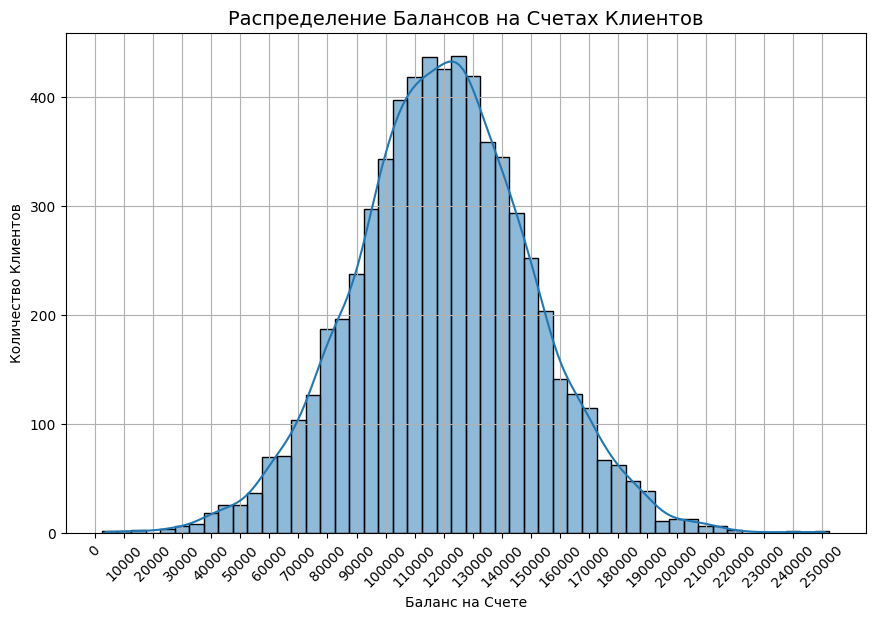

In [18]:
mask92=data['Balance']>2500
hist_data92=data[mask92]
fig92=plt.figure(figsize=(8,5))
axes92=fig92.add_axes([0,0,1,1])
axes92.set_title('Распределение Балансов на Счетах Клиентов', fontsize=14)
axes92.set_xlabel('Баланс на Счете')
axes92.set_ylabel('Количество Клиентов')
axes92.set_yticks(range(0, 600, 100))
axes92.set_xticks(range(0, 252500, 10000))
axes92.xaxis.set_tick_params(rotation=45)
axes92.grid()
sns.histplot(
    data=hist_data92,
    x='Balance',
    binwidth=5000,
    binrange=[2500,252500],
    kde=True,
    ax=axes92
);

Комментарий к заданию 9.2: Гистограмма распределения балансов средств на счетах клинетов имеет форму нормального распределения. Пиковое значение находится вблизи отметки в $120000, однако также хорошо заметна ассиметрия распределения вблизи пика, указывая на сдвиг в медианном значении. Минимальное и максимальное значения балансов клиентов располагаются в районе $2500 и $250000. В целом распределение описывает клиентов банка, как представителей среднего класса с равномерно распределенным уровнем достактка.

## Задание 9.3

Построение графика

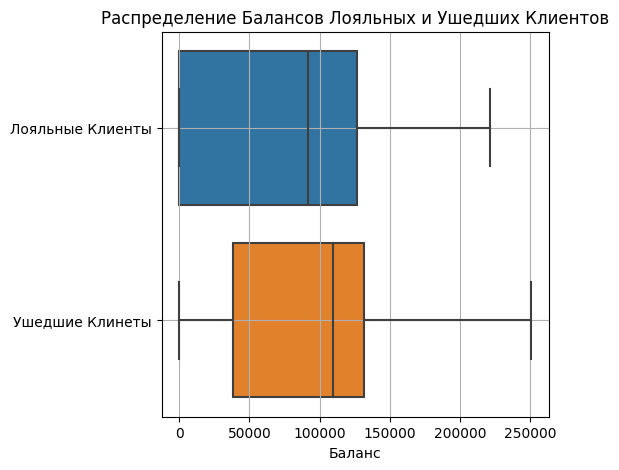

In [19]:
fig93=plt.figure(figsize=(5,5))
boxplot93=sns.boxplot(
    data=data,
    y='Exited',
    x='Balance',
    orient='h',
    width=0.8
)

boxplot93.set_title('Распределение Балансов Лояльных и Ушедших Клиентов')
boxplot93.set_xlabel('Баланс')
boxplot93.set_ylabel('')
boxplot93.set_yticks([1,0],['Ушедшие Клинеты','Лояльные Клиенты'])
boxplot93.grid();

Комментарий к заданию 9.3: В группе лояльных банку клиентов медианное значение составляет $90000, что ниже медианного значения группы ушедших клинетов равному $110000. Межквартильное расстояние в группе лояльных клиентов больше, чем в группе ушедших, указывая на более равномерное распределение балансов среди лояльных клиентов. Группа ушедших клиентов имеет нижний квартиль на отметке $40000, в то время как для группы лояльных клиентов данный показатель приблизительно соответсвует нулю. Центральным на мой взгляд выводом, являтся наличие больших накоплений на счетах ушедших клиентов, в сравнении с лояльными. Следовательно, возможная причина ухода клиентов - это недостаточно высокий процент по вкладам, что не удовлетворяет клиентов с большими накоплениями.

## Задание 9.4

Построение графика

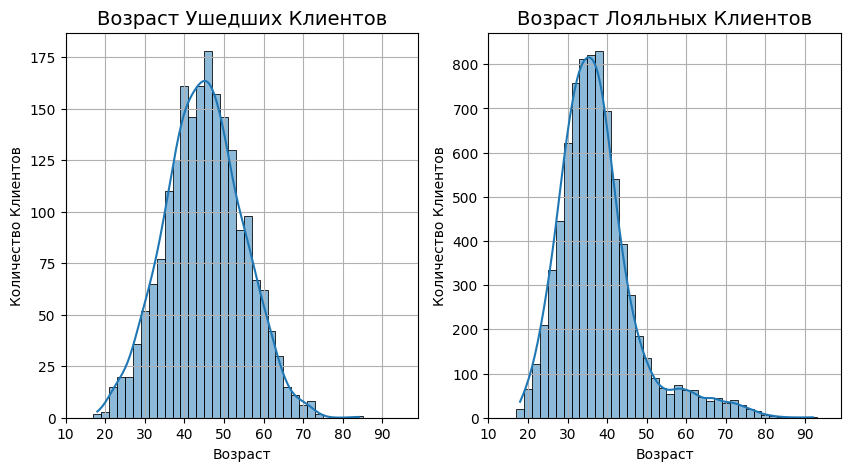

In [20]:
data_left94=data[data['Exited']==1]
data_loyal94=data[data['Exited']==0]
fig94, axes94=plt.subplots(nrows=1, ncols=2, figsize=(10,5))
sns.histplot(
    data=data_left94,
    x='Age',
    binwidth=2,
    binrange=[15,95],
    kde=True,
    ax=axes94[0]
)
sns.histplot(
    data=data_loyal94,
    x='Age',
    binwidth=2,
    binrange=[15,95],
    kde=True,
    ax=axes94[1]
)
axes94[0].set_title('Возраст Ушедших Клиентов', fontsize=14)
axes94[0].set_ylabel('Количество Клиентов')
axes94[0].set_xlabel('Возраст')
axes94[0].set_yticks(range(0, 200, 25))
axes94[0].set_xticks(range(10, 100, 10))
axes94[0].grid()

axes94[1].set_title('Возраст Лояльных Клиентов', fontsize=14)
axes94[1].set_ylabel('Количество Клиентов')
axes94[1].set_xlabel('Возраст')
axes94[1].set_yticks(range(0, 900, 100))
axes94[1].set_xticks(range(10, 100, 10))
axes94[1].grid();



Комментарий к заданию 9.4: Из распределения возрастов ушедших клиентов видны потенциальные выбросы для следующих возрастных корзин: 40 лет, 46 лет, 56 лет. В то же время из гистограммы лояльных клиентов прослеживается потенциальный выброс в корзине 38 лет. Следовательно в группе ушедших клиентов большее количество потенциальных выбросов. Банку следует обратить внимание на группу ушедших клиентов в возрасте 40-55 лет, так как вы этом возрасте наибольшее количество клиентов уходит из банка. Также вы этой группе зафиксированы выбросы, которые могут соответсвовать ужесточению политики банка в отношении клиентов в возрасте 40-55 лет (возможно есть взаимосвязь с возрастом выхода на пенсию в Европе).

## Задание 9.5

Построение графика

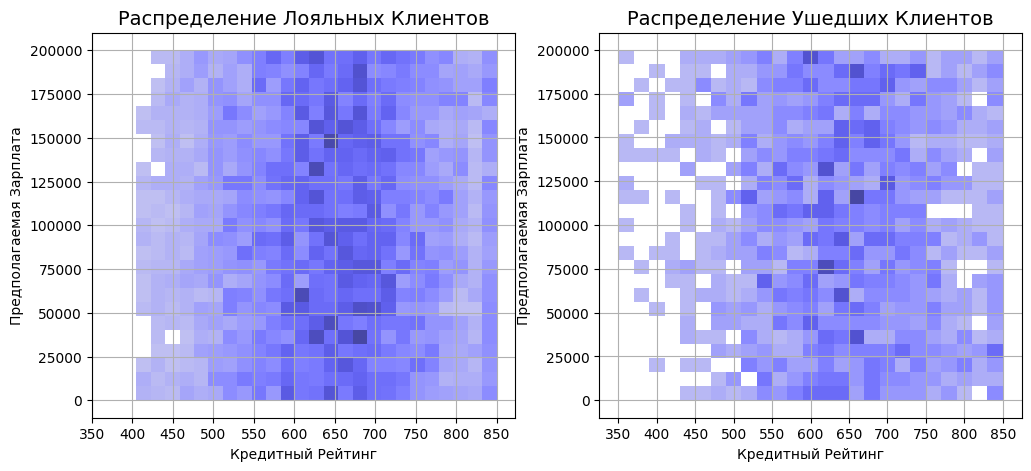

In [21]:
data_loyal95=data[data['Exited']==0]
data_exit95=data[data['Exited']==1]
fig95, axes95=plt.subplots(nrows=1,ncols=2,figsize=(12,5))
sns.histplot(
    data=data_loyal95,
    x='CreditScore',
    y='EstimatedSalary',
    bins=25,
    color='blue',
    ax=axes95[0]
)
sns.histplot(
    data=data_exit95,
    x='CreditScore',
    y='EstimatedSalary',
    bins=25,
    color='blue',
    ax=axes95[1]
)
axes95[0].set_title('Распределение Лояльных Клиентов',fontsize=14)
axes95[0].set_ylabel('Предполагаемая Зарплата')
axes95[0].set_xlabel('Кредитный Рейтинг')
axes95[0].set_xticks(range(350, 860, 50))
axes95[0].grid()

axes95[1].set_title('Распределение Ушедших Клиентов',fontsize=14)
axes95[1].set_ylabel('Предполагаемая Зарплата')
axes95[1].set_xlabel('Кредитный Рейтинг')
axes95[1].set_xticks(range(350, 860, 50))
axes95[1].grid();


Комментарий к заданию 9.5: На обоих графиках видно увеличение количества клиентов по линии кредитного рейтинга в 650, это общий признак для групп ушедших и лояльных клиентов, вероятно соответствующий большему количеству клиентов с таким кредитным рейтингом в целом в банке. На графике распределения ушедших клиентов можно обнаружить группу с низким кредитным рейтингом (ниже 400), которая отсутсвует на графике лояльных клиентов. Более того количество ушедших клиентов по линии кредитного рейтинга в 400 увеличивается с увеличивающимся показателем предполагаемой заработной платы. Возможно, показатель низкого кредитного рейтинга приносит определенные неудобства в пользовании накопительным счетом. Или же при использовании услуг данного банка, повышение кредитного рейтинга у клиентов с высокой предполагаемой заработной платой не происходит в достаточно быстрой манере.

## Задание 9.6

Построение графика

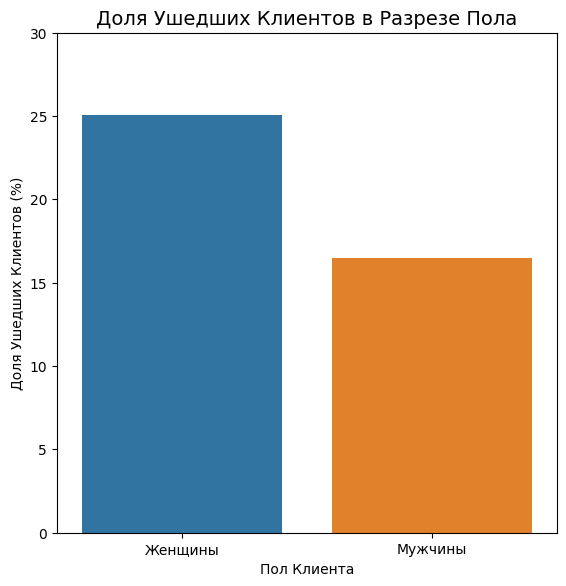

In [40]:
mask196=data['Gender']=='Female'
fem_left=data[mask196]['Exited'].mean()*100
mask296=data['Gender']=='Male'
mal_left=data[mask296]['Exited'].mean()*100

df_gen=pd.DataFrame({'Gender': ['Женщины', 'Мужчины'], 'Portion': [fem_left,mal_left]})
fig96=plt.figure(figsize=(5,5))
axes96=fig96.add_axes([0,0,1,1])
sns.barplot(
    data=df_gen,
    x='Gender',
    y='Portion',
    ax=axes96
)

axes96.set_title('Доля Ушедших Клиентов в Разрезе Пола', fontsize=14)
axes96.set_xlabel('Пол Клиента')
axes96.set_ylabel('Доля Ушедших Клиентов (%)')
axes96.set_yticks(range(0,35,5));

Комментарий к заданию 9.6: На 10% чаще уходят женщины.

## Задание 9.7

Построение графика

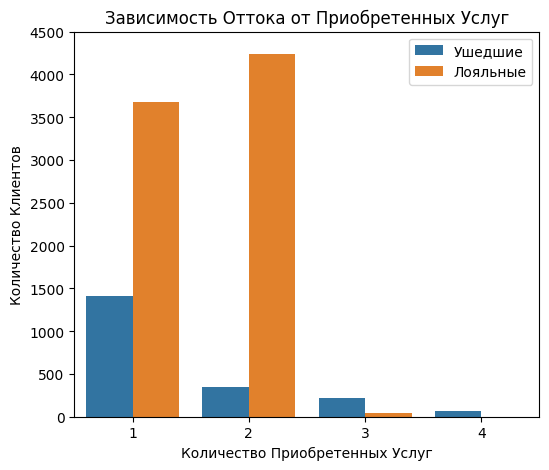

In [44]:
left97=(data.groupby(by='NumOfProducts')['Exited'].sum())
loyal97=(data.groupby(by='NumOfProducts')['Exited'].count())-(data.groupby(by='NumOfProducts')['Exited'].sum())
temp_df1=pd.DataFrame({'nump':left97.index, 'numc':left97.values, '':(['Ушедшие']*4)})
temp_df2=pd.DataFrame({'nump':loyal97.index, 'numc':loyal97.values, '':(['Лояльные']*4)})
new_df=pd.concat([temp_df1,temp_df2],axis=0)
fig97=plt.figure(figsize=(6,5))
barplot97=sns.barplot(
    data=new_df,
    x='nump',
    y='numc',
    hue=''
)
barplot97.set_title('Зависимость Оттока от Приобретенных Услуг')
barplot97.set_xlabel('Количество Приобретенных Услуг')
barplot97.set_ylabel('Количество Клиентов')
barplot97.set_yticks(range(0,5000,500));


Комментарий к заданию 9.7: С увеличением количества приобретенных у банка услуг, количество ушедших клиентов монотонно снижается. Подобный тренд можно было бы объяснить монотонно уменьшающимся общим количеством клиентов банка с увеличивающимся количеством приобретенных услуг. Однако данные для лояльных клиентов указывают, что наибольшее число клиентов использовали 2 услуги банка, соответственно большее количество услуг приобретенных у банка имеет свойство останавливать клиентов от ухода.

## Задание 9.8

Построение графика

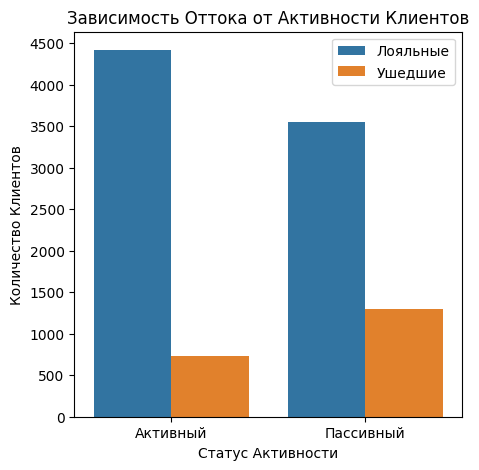

In [43]:
mask198=data['Exited']==0
mask298=data['Exited']==1
part198=data[mask198]['IsActiveMember'].value_counts()
part298=data[mask298]['IsActiveMember'].value_counts()
df198=pd.DataFrame({'active': ['Активный', 'Пассивный'], 'nump': part198.values, '': ['Лояльные']*2})
df298=pd.DataFrame({'active': ['Пассивный', 'Активный'], 'nump': part298.values, '': ['Ушедшие']*2})
df_tot=pd.concat([df198,df298],axis=0)
fig98=plt.figure(figsize=(5,5))
barplot98=sns.barplot(
    data=df_tot,
    x='active',
    y='nump',
    hue=''
)
barplot98.set_title('Зависимость Оттока от Активности Клиентов')
barplot98.set_xlabel('Статус Активности')
barplot98.set_ylabel('Количество Клиентов')
barplot98.set_yticks(range(0,5000,500));

Комментарий к заданию 9.8: В районе двух раз увеличивается число ушедших клиентов в зависимости от активности. Банку следовало бы разработать стратегию по активизации группы пассивных клиентов, возможно, путем предложения услуг (как видно из задания 9.7, эффективный способ для удержания клиентов) на льготных условиях.

## Задание 9.9

Построение графика

In [48]:
ser99=data.groupby(by='Geography')['Exited'].mean()
display(ser99)

Geography
France     0.161548
Germany    0.324432
Spain      0.166734
Name: Exited, dtype: float64

In [56]:
ser99=data.groupby(by='Geography')['Exited'].mean()
df99=pd.DataFrame({'Country': ser99.index, 'Доля Ушедших Клиентов (%)':ser99.values*100})
df99['Доля Ушедших Клиентов (%)']=df99['Доля Ушедших Клиентов (%)'].apply(lambda x: round(x,1))

fg99=px.choropleth(
    data_frame=df99,
    locations='Country',
    locationmode = "country names",
    color="Доля Ушедших Клиентов (%)",
    range_color=[0, 40], 
    title='Географическое Распределение Ушедших Клиентов', 
    width=800, 
    height=500, 
    color_continuous_scale='Reds'
)

fg99.show()

Комментарий к заданию 9.9: Наибольшая доля ушедших клиентов в Германии и составляет 32%. В то же время во Франции и Испании доли ушедших клиентов близки друг к другу и составляют приблизительно 16%. Подобная ситуация может быть связана с ужесточением политики банка в отношении клиентов из Германии, появлением банка конкурента действующего на территории Германии и предоставляющего лучшие условия по вкладам. 

## Задание 9.10

Функция из задания

In [14]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

Построение графика

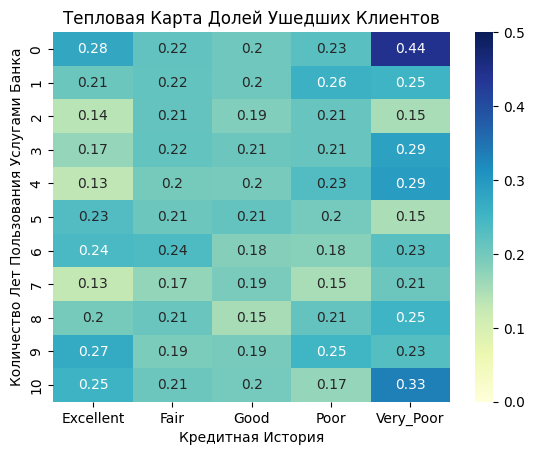

In [57]:
data['CreditScoreCat']=data['CreditScore'].apply(get_credit_score_cat)
data['CreditScoreCat']=data['CreditScoreCat'].astype('category')
pivot=data.pivot_table('Exited','Tenure','CreditScoreCat', aggfunc='mean')
heatmap = sns.heatmap(data=pivot, vmin=0, vmax=0.5, cmap='YlGnBu', annot=True)
heatmap.set_title('Тепловая Карта Долей Ушедших Клиентов')
heatmap.set_ylabel('Количество Лет Пользования Услугами Банка')
heatmap.set_xlabel('Кредитная История');


Комментарий к заданию 9.10: Чаще всего уходят клиенты с наиболее плохой кредитной историей, только начавшие пользоваться услугами банка (44%). В целом заметно большее количестве ушедших клиентов для группы с очень плохой кредитной историей. Также стоит обратить внимание на группу клиентов с наилучшей кредитной историей пользующихся услугами банка 9 и 10 лет.